In [3]:
import pandas as pd
import numpy as np
import seaborn as sns

In [4]:
baseline = np.random.binomial(1, .2, 1000)

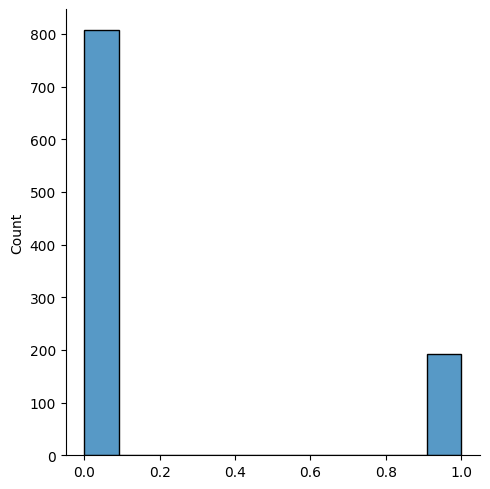

In [10]:
sns.displot(baseline)

In [21]:
mde = 0.05
baseline = 0.2
sample_size = 1030



In [12]:
from statsmodels.stats.proportion import proportions_ztest

In [24]:
from tqdm.notebook import tqdm

H0 - разницы между группами нет(группы пришли из одного распределения)

In [25]:
result = []
for _ in tqdm(range(10000)):
  group_A = np.random.binomial(1, baseline, sample_size)
  group_B = np.random.binomial(1, baseline + mde, sample_size)
  _ , p_val = proportions_ztest([group_A.sum(), group_B.sum()], [len(group_A),len(group_B)])
  result.append(p_val)

  0%|          | 0/10000 [00:00<?, ?it/s]

(-0.1, 0.7)

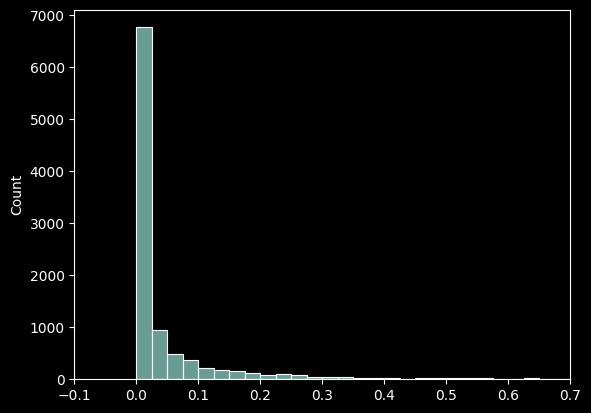

In [36]:
import matplotlib.pyplot as plt
plt.style.use('dark_background')
sns.histplot(result, bins = 40)
plt.xlim((-.1,.7))

In [37]:
t = pd.Series(result)

In [38]:
(t < .05).mean() # мощность теста

0.7723

# А/А тест

In [39]:
result = []
for _ in tqdm(range(10000)):
  group_A = np.random.binomial(1, baseline, sample_size)
  group_B = np.random.binomial(1, baseline, sample_size)
  _ , p_val = proportions_ztest([group_A.sum(), group_B.sum()], [len(group_A),len(group_B)])
  result.append(p_val)

  0%|          | 0/10000 [00:00<?, ?it/s]

(-0.1, 0.7)

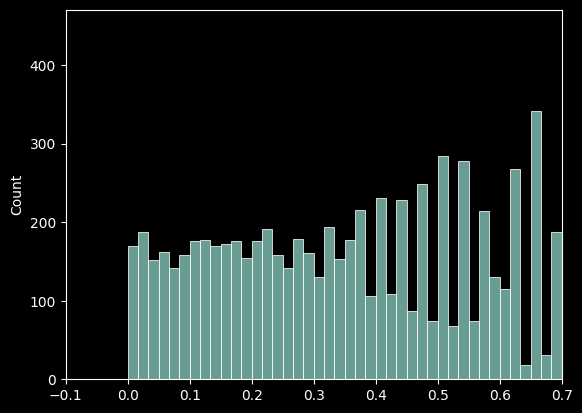

In [42]:
sns.histplot(result, bins = 60)  # при А/А тесте распределение p-value имеет равномерный вид
plt.xlim((-.1,.7))

<Axes: ylabel='Proportion'>

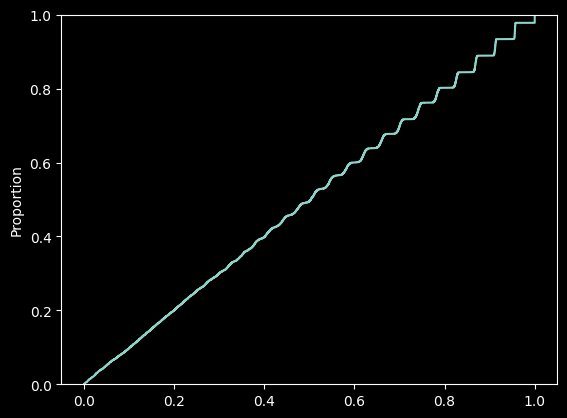

In [43]:
sns.ecdfplot(result)

In [44]:
t = pd.Series(result)
(t < .05).mean() # получаем вероятность ошибки первого рода(уровень значимости теста)

0.0508

# Sample size для равных групп


In [45]:
import statsmodels.stats.api as sms
es = sms.proportion_effectsize(0.20, 0.25)
sample_size = round(sms.NormalIndPower().solve_power(es, power=0.80, alpha=0.05, ratio=1))

In [46]:
sample_size

1092

In [48]:
result = []
for _ in tqdm(range(10000)):
  group_A = np.random.binomial(1, baseline, sample_size)
  group_B = np.random.binomial(1, baseline + mde, sample_size)
  _ , p_val = proportions_ztest([group_A.sum(), group_B.sum()], [len(group_A),len(group_B)])
  result.append(p_val)
t = pd.Series(result)
(t < .05).mean() # получаем вероятность ошибки первого рода(уровень значимости теста)

  0%|          | 0/10000 [00:00<?, ?it/s]

0.7955

# Sample size для разных групп

In [49]:
import statsmodels.stats.api as sms
es = sms.proportion_effectsize(0.20, 0.25)
sample_size = round(sms.NormalIndPower().solve_power(es, power=0.80, alpha=0.05, ratio=1/3))

In [54]:
sample_size1 = round(sample_size)

In [55]:
sample_size2 = round(sample_size/3)

In [56]:
result = []
for _ in tqdm(range(10000)):
  group_A = np.random.binomial(1, baseline, sample_size1)
  group_B = np.random.binomial(1, baseline + mde, sample_size2)
  _ , p_val = proportions_ztest([group_A.sum(), group_B.sum()], [len(group_A),len(group_B)])
  result.append(p_val)
t = pd.Series(result)
(t < .05).mean() # получаем вероятность ошибки первого рода(уровень значимости теста)

  0%|          | 0/10000 [00:00<?, ?it/s]

0.7995

# Проверка гипотез как проблема классификации

In [64]:
sample_size = 1030
result = []
for _ in tqdm(range(10000)):
  group_A = np.random.binomial(1, baseline, sample_size)
  group_B = np.random.binomial(1, baseline + mde, sample_size)
  _ , p_val = proportions_ztest([group_A.sum(), group_B.sum()], [len(group_A),len(group_B)])
  result.append([1, p_val])

t = pd.DataFrame(result, columns = ['y_true', 'p_val'])
t

  0%|          | 0/10000 [00:00<?, ?it/s]

,y_true,p_val
0,1,3.135639e-05
1,1,1.073747e-01
2,1,2.482981e-07
3,1,4.818529e-05
4,1,4.194518e-02
...,...,...
9995,1,2.617772e-02
9996,1,6.992114e-02
9997,1,3.004531e-03
9998,1,1.403381e-01


In [65]:
t['y_pred'] = (t['p_val'] < .05) * 1
t

,y_true,p_val,y_pred
0,1,3.135639e-05,1
1,1,1.073747e-01,0
2,1,2.482981e-07,1
3,1,4.818529e-05,1
4,1,4.194518e-02,1
...,...,...,...
9995,1,2.617772e-02,1
9996,1,6.992114e-02,0
9997,1,3.004531e-03,1
9998,1,1.403381e-01,0


In [66]:
t['y_pred'].mean()

0.7792

In [67]:
sample_size = 1030
result = []
for _ in tqdm(range(10000)):
  group_A = np.random.binomial(1, baseline, sample_size)
  group_B = np.random.binomial(1, baseline, sample_size)
  _ , p_val = proportions_ztest([group_A.sum(), group_B.sum()], [len(group_A),len(group_B)])
  result.append([0, p_val])

t = pd.DataFrame(result, columns = ['y_true', 'p_val'])
t

  0%|          | 0/10000 [00:00<?, ?it/s]

,y_true,p_val
0,0,0.510157
1,0,0.184571
2,0,0.118158
3,0,0.291291
4,0,0.063206
...,...,...
9995,0,0.434640
9996,0,0.457924
9997,0,0.405652
9998,0,0.223891


In [68]:
t['y_pred'] = (t['p_val'] < .05) * 1
t

,y_true,p_val,y_pred
0,0,0.510157,0
1,0,0.184571,0
2,0,0.118158,0
3,0,0.291291,0
4,0,0.063206,0
...,...,...,...
9995,0,0.434640,0
9996,0,0.457924,0
9997,0,0.405652,0
9998,0,0.223891,0


In [69]:
t['y_pred'].mean()

0.0496

# Несбалансированная выборка экспериментов

In [76]:
sample_size = 1030
class_balance = .5
result = []
label = 0
for _ in tqdm(range(10000)):
  if np.random.binomial(1, class_balance):
    group_A = np.random.binomial(1, baseline, sample_size)
    group_B = np.random.binomial(1, baseline, sample_size)
    label = 0
  else:
    group_A = np.random.binomial(1, baseline, sample_size)
    group_B = np.random.binomial(1, baseline + mde, sample_size)
    label = 1
  _ , p_val = proportions_ztest([group_A.sum(), group_B.sum()], [len(group_A),len(group_B)])
  result.append([label, p_val])

  0%|          | 0/10000 [00:00<?, ?it/s]

In [77]:
t = pd.DataFrame(result, columns = ['y_true', 'p_val'])
t['y_true'].mean()

0.5041

In [78]:
t['y_pred'] = (t['p_val'] < .05) * 1
t

,y_true,p_val,y_pred
0,1,0.011228,1
1,0,0.692956,0
2,1,0.004879,1
3,0,0.704080,0
4,1,0.000737,1
...,...,...,...
9995,1,0.003748,1
9996,0,0.283843,0
9997,0,0.121635,0
9998,1,0.020305,1


In [80]:
from sklearn.metrics import classification_report
print(classification_report(t['y_true'], t['y_pred']))

              precision    recall  f1-score   support

           0       0.81      0.95      0.87      4959
           1       0.94      0.78      0.85      5041

    accuracy                           0.86     10000
   macro avg       0.87      0.86      0.86     10000
weighted avg       0.88      0.86      0.86     10000

